In [2]:
import tensorflow as tf
import os
import glob
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

os.environ['CUDA_VISIBLE_DEVICES'] = ''

import numpy as np
from keras.layers import  Input,Conv2D,BatchNormalization,Activation,Subtract
from keras.models import Model, load_model
from keras.callbacks import CSVLogger, ModelCheckpoint, LearningRateScheduler
from keras.optimizers import Adam
import keras.backend as K

model = load_model('FCN_baseline.h5')

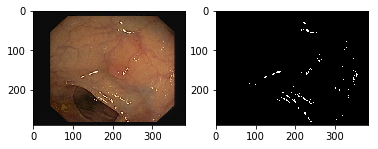

In [3]:
img = io.imread('CVC-612/bbdd_png/291.png')
img = img.astype('float') / 255.0
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
th = 0.4
prediction[prediction > 0.6] = 1.0
prediction[prediction <= 0.6] = 0

plt.subplot(1,2,1)
plt.imshow(img[0, :,:,:])
plt.subplot(1,2,2)
plt.imshow(prediction[0, :,:,0], cmap='gray')
plt.show()

In [ ]:
# predict all images
input_dir = 'CVC-612/bbdd_png'
output_dir = 'results'

input_img_paths = glob.glob(os.path.join(input_dir, '*.png'))

for path in input_img_paths:
    img = io.imread(path)
    img = img.astype('float') / 255.0
    img = np.expand_dims(img, axis=0)
    
    specular_mask = model.predict(img)
    
    th = 0.4
    specular_mask[prediction > 0.6] = 1.0
    specular_mask[prediction <= 0.6] = 0
    specular_mask = np.squeeze(specular_mask)
    
    save_name = os.path.basename(path)
    save_path = os.path.join(output_dir, save_name)
    io.imsave(save_path, specular_mask)